The complete explanation for this notebook is available at https://youranalystbuddy.com/regularized-linear-models/

## Loading data and create pipeline for quadratic features

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('auto-mpg.csv')

train, test = train_test_split(data, test_size=0.2)

num_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
cat_cols = ['origin']
target = 'mpg'

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#pipeline for class features
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

num_pipeline = Pipeline([    
    ('impute', SimpleImputer(strategy='median')),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler()),
])

data_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

In [ ]:
train_features = data_pipeline.fit_transform(train)
test_features = data_pipeline.transform(test)

## Ridge regression

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100, 500, 1000]}]

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2', return_train_score=True)

grid_search.fit(train_features,train[[target]])

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                    10, 50, 100, 500, 1000]}],
             return_train_score=True, scoring='r2')

In [3]:
grid_search.best_params_

{'alpha': 1}

In [4]:
grid_search.best_score_

0.8463973774175086

In [5]:
best_ridge_reg = grid_search.best_estimator_

best_ridge_reg.score(test_features, test[[target]])

0.8921331386167156

In [6]:
best_ridge_reg.intercept_

array([23.71252577])

In [7]:
best_ridge_reg.coef_

array([[ 0.        ,  0.83751204,  0.24892831,  0.20735098, -2.19040889,
        -2.11722903,  0.56250097, -1.25467994, -0.51640642,  1.68992284,
         1.70839162,  1.17216383, -1.76602309,  0.20549716,  1.41239913,
         2.85856026, -1.4007107 , -1.77358154,  0.04127033,  0.67829776,
        -0.27528932, -3.57577461,  2.44392965, -1.00475725, -4.92874985,
         0.71644354,  1.84224402,  3.57787076, -0.8991697 ,  0.67836103,
         0.22080867]])

<h3>LASSO</h3>

Is very similar to Ridge Regression, however, LASSO models add the sum of absolute coefficients to the training objective

$\min_\beta⁡ \frac{1}{2𝑛} \sum_{𝑑𝑎𝑡𝑎}(𝑦−\hat{y})^2 + \alpha \sum |\beta_𝑖|$

where 𝑛 is the size (number of instances) in the training data

We use the Lasso class from linear_model module. The default alpha is also 1. 2nd-degree polynomial data seems to be the best feature set, so I'll just consider that set from now

In [8]:
from sklearn.linear_model import Lasso

param_grid = [{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, scoring='r2', return_train_score=True)

grid_search.fit(train_features, train[[target]])

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.298e+02, tolerance: 1.806e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.435e+02, tolerance: 1.721e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.571e+01, tolerance: 1.956e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                    10, 50, 100]}],
             return_train_score=True, scoring='r2')

Not very impressive performance, let's try finetuning the model

In [9]:
grid_search.best_params_

{'alpha': 0.01}

In [10]:
grid_search.best_score_

0.8479689185491377

And the best alpha value:

In [11]:
best_lasso_reg = grid_search.best_estimator_

best_lasso_reg.score(test_features, test[[target]])

0.8888602375125443

In [12]:
best_lasso_reg.intercept_

array([23.91074844])

In [13]:
best_lasso_reg.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  5.65905266e-01,  9.61247397e-02,  1.08807210e-01,
       -0.00000000e+00, -0.00000000e+00,  1.27119153e+00,  3.66384846e+00,
       -1.68968331e+00, -1.30005457e+00,  2.72942564e-01,  0.00000000e+00,
       -3.48634887e-03, -2.88894925e+00,  3.74498697e+00, -0.00000000e+00,
       -8.75517540e+00,  7.03693691e-02,  3.57038726e-01,  4.75625265e+00,
       -1.09113050e+00,  4.81294295e-01, -0.00000000e+00])

And the result is very similar to Ridge regression

<h3>Elastic Net</h3>

Is a combination of Ridge Regression and LASSO – both the squared and the absolute coefficients are added to the training objective

$min_\beta⁡ (\frac{1}{2𝑛} \sum_{𝑑𝑎𝑡𝑎}(𝑦−\hat{y})^2 + \alpha\rho\sum |\beta_𝑖| + \frac{1}{2}\alpha(1−\rho) \sum \beta_𝑖^2$
	
in Elastic-Net, we have another hyper-parameter - 𝜌, so we will 	need to finetune both 𝛼 and 𝜌


In [14]:
from sklearn.linear_model import ElasticNet

param_grid = [{
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}]

grid_search = GridSearchCV(ElasticNet(max_iter=5000), param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(train_features, train[[target]])

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.046e+02, tolerance: 1.570e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.327e+02, tolerance: 1.577e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.950e+02, tolerance: 1.577e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.800e+02, tolerance: 1.601e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+00, tolerance: 1.570e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+00, tolerance: 1.570e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=5000),
             param_grid=[{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                    10, 50, 100],
                          'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9]}],
             return_train_score=True, scoring='r2')

Again, not very impressive performance before finetuning

There are too many models to look at individually now, we will just focus on the best one

In [15]:
grid_search.best_params_

{'alpha': 0.001, 'l1_ratio': 0.2}

In [16]:
grid_search.best_score_

0.8534936887179224

In [17]:
best_enet_reg = grid_search.best_estimator_

best_enet_reg.score(test_features, test[[target]])

0.8945114660945874

In [18]:
best_enet_reg.intercept_

array([23.81738964])

In [19]:
best_enet_reg.coef_

array([ 0.        ,  0.14447701,  0.62380853,  2.88679694, -2.0910676 ,
       -5.10829629, -2.24027596, -3.26204204, -1.78357089,  4.14785543,
        3.46070158,  2.12423058, -1.80316886, -1.19578085,  2.09957472,
        5.26320413, -2.71903933, -0.23177342, -1.44040408, -1.28128595,
       -0.06498518, -5.4350567 ,  2.71774701, -0.28316457, -7.08419556,
        1.37962996,  3.64636151,  6.4302643 , -1.0229836 ,  0.69716975,
        0.07620074])

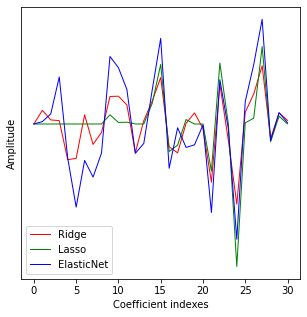

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(best_ridge_reg.coef_[0], c='red', linewidth=1)
plt.plot(best_lasso_reg.coef_, c='green', linewidth=1)
plt.plot(best_enet_reg.coef_, c='blue', linewidth=1)
plt.xlabel('Coefficient indexes')
plt.ylabel('Amplitude')
plt.legend(['Ridge', 'Lasso', 'ElasticNet'])
plt.tick_params(
    axis='y',
    which='both',     
    left=False,
    labelleft=False)
plt.show()
plt.clf()

## Performance comparison

To sum up, the three best models' R2:

|Model|Training CV R2| Testing R2|
|-----|--------------|-----------|
|Ridge|0.852         |0.893      |
|LASSO|0.851         |0.895      |
|ENet |0.851         |0.895      |

Which are very similar in both training and testing data. Depending on the data, these models' performance may vary more, but you should not expect to see tremendous differences since all three are different versions of linear regression models.